In [6]:
from __future__ import print_function
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

%matplotlib inline
warnings.filterwarnings('ignore')

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
X= df_train.drop(columns= 'label')
Y= df_train['label']

In [8]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = Y
df['label'] = df['y'].apply(lambda i: str(i))
X, Y = None, None

In [9]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [10]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09748938 0.07160266 0.06145903]


In [13]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
import plotly
import matplotlib.pyplot as plt

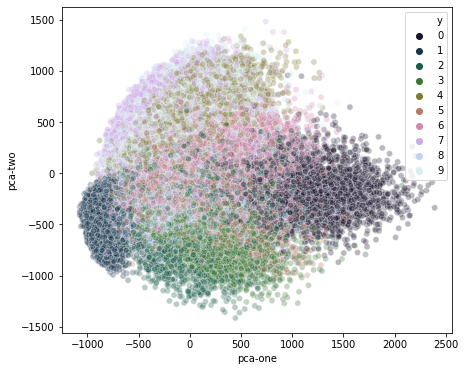

In [14]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("cubehelix", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

plt.savefig('PCA.png')